In [55]:
# Packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, LinearRegression, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [56]:
# Options
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', -1)

In [85]:
explore_in = './data/transformed_data/explore.csv'
train_in = './data/transformed_data/model_train.csv'
test_in = './data/transformed_data/model_test.csv'
model_out = './data/transformed_data/linear_models.csv'
drop_features = [
    'Neighborhood', 'MSZoning', 'BldgType', 'Functional', 'MSSubClass', 
    'Condition1', 'LotConfig', 'Exterior1st', 'MasVnrType', 'SaleType', 
    'SaleCondition', 'Id', 'SalePrice'
]

#### Creating the Base Datasets

In [86]:
# Import Files
df_train_in = pd.read_csv(train_in)
df_test_in = pd.read_csv(test_in)
df_results = pd.read_csv(explore_in)
df_results = df_results[(df_results['TotalArea'] <= 10000)]
df_results['SalePriceLog'] = np.log1p(df_results['SalePrice'])

# Results Dataset
end_col = ['SalePrice', 'SalePriceLog']
df_results = df_results[[col for col in df_results if col not in end_col] + end_col]

# Define Features & Target
master_target = df_train_in[['SalePrice']]
master_features = df_train_in.drop(drop_features, axis=1)
df_train_in.head()

,Id,OverallQual,PropertyAge,OverallGrade,ExterGrade,CoreArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotalArea,LotArea,FullBath,HalfBath,TotalBath,TotRmsAbvGrd,BedroomAbvGr,KitchenAbvGr,SimpleOverallQual,SimpleOverallCond,Neighborhood,MSZoning,BldgType,Functional,MSSubClass,Condition1,LotConfig,Exterior1st,MasVnrType,SaleType,SaleCondition,IsRemodelled,IsNew,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,...,MSSubClass_85,MSSubClass_90,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.510826,0.036105,0.323548,0.342945,0.312078,0.236651,0.165831,0.385090,0.349146,0.337489,0.032874,0.405465,0.223144,0.405465,0.405465,0.318454,0.287682,0.510826,0.405465,CollgCr,RL,1Fam,Typ,60,Norm,Inside,VinylSd,BrkFace,WD,Normal,1,0,12.247699,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,0.441833,0.205339,0.424019,0.241162,0.307021,0.331917,0.278134,0.000000,0.248273,0.297811,0.038061,0.287682,0.223144,0.262364,0.287682,0.318454,0.287682,0.287682,0.693147,Veenker,RL,1Fam,Typ,20,Feedr,FR2,MetalSd,None,WD,Normal,1,0,12.109016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,0.510826,0.050190,0.323548,0.342945,0.328753,0.252284,0.184393,0.389571,0.365292,0.354492,0.045458,0.405465,0.223144,0.405465,0.287682,0.318454,0.287682,0.510826,0.405465,CollgCr,RL,1Fam,Typ,60,Norm,Inside,VinylSd,BrkFace,WD,Normal,0,0,12.317171,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,0.510826,0.512295,0.323548,0.241162,0.300846,0.211725,0.196105,0.347724,0.350644,0.330638,0.037836,0.287682,0.000000,0.182322,0.348307,0.318454,0.287682,0.510826,0.405465,Crawfor,RL,1Fam,Typ,70,Norm,Corner,Wd Sdng,None,WD,Abnorml,0,0,11.849405,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,0.575364,0.057158,0.363394,0.342945,0.401299,0.305382,0.247044,0.456923,0.448556,0.433189,0.058812,0.405465,0.223144,0.405465,0.459532,0.405465,0.287682,0.510826,0.405465,NoRidge,RL,1Fam,Typ,60,Norm,FR2,VinylSd,BrkFace,WD,Normal,1,0,12.429220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


#### Model Functions

In [142]:
def append_results(df, model, name, features):
    df[name] = np.expm1(model.predict(features)).astype(int)
    df['{}Error'.format(name)] = df[name] - df['SalePrice']
    df['{}RMSE'.format(name)] = np.sqrt(df['{}Error'.format(name)]**2)
    
    return df

def get_score(features, target):
    # Train
    r2 = r2_score(features, target)
    rmse = np.sqrt(mean_squared_error(features, target))
    print('R2: {}'.format(round(r2, 4)))
    print('RMSE: {}'.format(round(rmse, 4)))    
    
    
def execute_model(model, features, target, test_features, test_target):
    print(model)
    train_prediction = model.predict(features)
    get_score(train_prediction, target)
    test_prediction = model.predict(test_features)
    get_score(test_prediction, test_target) 
    
def execute_final_model(model, features, target):
    master_prediction = model.predict(features)
    get_score(master_prediction, target)
    
def show_coefficients(model, features):
    coef_df = pd.DataFrame()
    coef_df['coef'] = model.coef_.ravel()
    coef_df['cols'] = ridge_features.columns.tolist()
    matplotlib.rcParams['figure.figsize'] = (10.0, 30.0)
    coef_df.plot(
        kind='barh',
        x='cols',
        y='coef'
    )
    plt.title("Coefficients in the Ridge Model")

In [125]:
cols = features.columns.tolist()

#### Ridge

In [126]:
model_drop_features = [
    'OverallQual',
#     'PropertyAge',
#     'OverallGrade',
#     'ExterGrade',
    'CoreArea',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
#     'TotalArea',
#     'LotArea',
#     'FullBath',
#     'HalfBath',
    'TotalBath',
#     'TotRmsAbvGrd',
#     'BedroomAbvGr',
#     'KitchenAbvGr',
#     'SimpleOverallQual',
#     'SimpleOverallCond',
    'IsRemodelled',
    'IsNew',
#     'Neighborhood_Blmngtn',
#     'Neighborhood_Blueste',
#     'Neighborhood_BrDale',
#     'Neighborhood_BrkSide',
#     'Neighborhood_ClearCr',
#     'Neighborhood_CollgCr',
#     'Neighborhood_Crawfor',
#     'Neighborhood_Edwards',
#     'Neighborhood_Gilbert',
#     'Neighborhood_IDOTRR',
#     'Neighborhood_MeadowV',
#     'Neighborhood_Mitchel',
#     'Neighborhood_NAmes',
#     'Neighborhood_NPkVill',
#     'Neighborhood_NWAmes',
#     'Neighborhood_NoRidge',
#     'Neighborhood_NridgHt',
#     'Neighborhood_OldTown',
#     'Neighborhood_SWISU',
#     'Neighborhood_Sawyer',
#     'Neighborhood_SawyerW',
#     'Neighborhood_Somerst',
#     'Neighborhood_StoneBr',
#     'Neighborhood_Timber',
#     'Neighborhood_Veenker',
#     'MSZoning_C (all)',
#     'MSZoning_FV',
#     'MSZoning_RH',
#     'MSZoning_RL',
#     'MSZoning_RM',
#     'BldgType_1Fam',
#     'BldgType_2fmCon',
#     'BldgType_Duplex',
#     'BldgType_Twnhs',
#     'BldgType_TwnhsE',
#     'Functional_Maj1',
#     'Functional_Maj2',
#     'Functional_Min1',
#     'Functional_Min2',
#     'Functional_Mod',
#     'Functional_Sev',
#     'Functional_Typ',
#     'MSSubClass_120',
#     'MSSubClass_160',
#     'MSSubClass_180',
#     'MSSubClass_190',
#     'MSSubClass_20',
#     'MSSubClass_30',
#     'MSSubClass_40',
#     'MSSubClass_45',
#     'MSSubClass_50',
#     'MSSubClass_60',
#     'MSSubClass_70',
#     'MSSubClass_75',
#     'MSSubClass_80',
#     'MSSubClass_85',
#     'MSSubClass_90',
    'Condition1_Artery',
    'Condition1_Feedr',
    'Condition1_Norm',
    'Condition1_PosA',
    'Condition1_PosN',
    'Condition1_RRAe',
    'Condition1_RRAn',
    'Condition1_RRNe',
    'Condition1_RRNn',
#     'LotConfig_Corner',
#     'LotConfig_CulDSac',
#     'LotConfig_FR2',
#     'LotConfig_FR3',
#     'LotConfig_Inside',
#     'Exterior1st_AsbShng',
#     'Exterior1st_AsphShn',
#     'Exterior1st_BrkComm',
#     'Exterior1st_BrkFace',
#     'Exterior1st_CBlock',
#     'Exterior1st_CemntBd',
#     'Exterior1st_HdBoard',
#     'Exterior1st_ImStucc',
#     'Exterior1st_MetalSd',
#     'Exterior1st_Plywood',
#     'Exterior1st_Stone',
#     'Exterior1st_Stucco',
#     'Exterior1st_VinylSd',
#     'Exterior1st_Wd Sdng',
#     'Exterior1st_WdShing',
#     'MasVnrType_BrkCmn',
#     'MasVnrType_BrkFace',
#     'MasVnrType_None',
#     'MasVnrType_Stone',
#     'SaleType_COD',
#     'SaleType_CWD',
#     'SaleType_Con',
#     'SaleType_ConLD',
#     'SaleType_ConLI',
#     'SaleType_ConLw',
#     'SaleType_New',
#     'SaleType_Oth',
#     'SaleType_WD',
#     'SaleCondition_Abnorml',
#     'SaleCondition_AdjLand',
#     'SaleCondition_Alloca',
#     'SaleCondition_Family',
#     'SaleCondition_Normal',
#     'SaleCondition_Partial'
]

In [127]:
# Train/Test split
features, test_features, target, test_target = train_test_split(
    master_features.drop(model_drop_features, axis=1), 
    master_target,
    test_size=0.1,
    random_state=69
)

In [128]:
# CV Model
cv_model = RidgeCV(
    alphas=[0.01, 0.03, 0.06, 0.1, 0.2, 0.3, 0.35, 0.6, 1, 3, 5, 10, 50],
    store_cv_values=True
)
cv_model.fit(features, target)

RidgeCV(alphas=[0.01, 0.03, 0.06, 0.1, 0.2, 0.3, 0.35, 0.6, 1, 3, 5, 10, 50],
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [144]:
# Individual Model
model = Ridge(alpha=5)
model.fit(features, target)
execute_model(model, features, target, test_features, test_target)
# show_coefficients(model, features)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2: 0.8661
RMSE: 0.1293
R2: 0.8688
RMSE: 0.125


In [150]:
# Master Model
model = Ridge(alpha=5)
final_features = master_features
final_target = master_target

model.fit(final_features, final_target)
execute_final_model(model,final_features, final_target)
df_results = append_results(df_results, model, 'Ridge', final_features)

R2: 0.9006
RMSE: 0.1155


In [ ]:
# Ridge Submission
test_features = df_test_in[lasso_features.columns.tolist()]
df_sub = pd.DataFrame()
df_sub['Id'] = df_test_in['Id']
df_sub['SalePrice'] = np.expm1(model.predict(test_features))
df_sub.to_csv('./data/output_data/my_submission.csv', index=False)

#### Lasso

In [134]:
model_drop_features = [
    'OverallQual',
#     'PropertyAge',
#     'OverallGrade',
#     'ExterGrade',
    'CoreArea',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
#     'TotalArea',
#     'LotArea',
#     'FullBath',
#     'HalfBath',
    'TotalBath',
#     'TotRmsAbvGrd',
#     'BedroomAbvGr',
#     'KitchenAbvGr',
#     'SimpleOverallQual',
#     'SimpleOverallCond',
    'IsRemodelled',
    'IsNew',
#     'Neighborhood_Blmngtn',
#     'Neighborhood_Blueste',
#     'Neighborhood_BrDale',
#     'Neighborhood_BrkSide',
#     'Neighborhood_ClearCr',
#     'Neighborhood_CollgCr',
#     'Neighborhood_Crawfor',
#     'Neighborhood_Edwards',
#     'Neighborhood_Gilbert',
#     'Neighborhood_IDOTRR',
#     'Neighborhood_MeadowV',
#     'Neighborhood_Mitchel',
#     'Neighborhood_NAmes',
#     'Neighborhood_NPkVill',
#     'Neighborhood_NWAmes',
#     'Neighborhood_NoRidge',
#     'Neighborhood_NridgHt',
#     'Neighborhood_OldTown',
#     'Neighborhood_SWISU',
#     'Neighborhood_Sawyer',
#     'Neighborhood_SawyerW',
#     'Neighborhood_Somerst',
#     'Neighborhood_StoneBr',
#     'Neighborhood_Timber',
#     'Neighborhood_Veenker',
#     'MSZoning_C (all)',
#     'MSZoning_FV',
#     'MSZoning_RH',
#     'MSZoning_RL',
#     'MSZoning_RM',
#     'BldgType_1Fam',
#     'BldgType_2fmCon',
#     'BldgType_Duplex',
#     'BldgType_Twnhs',
#     'BldgType_TwnhsE',
#     'Functional_Maj1',
#     'Functional_Maj2',
#     'Functional_Min1',
#     'Functional_Min2',
#     'Functional_Mod',
#     'Functional_Sev',
#     'Functional_Typ',
#     'MSSubClass_120',
#     'MSSubClass_160',
#     'MSSubClass_180',
#     'MSSubClass_190',
#     'MSSubClass_20',
#     'MSSubClass_30',
#     'MSSubClass_40',
#     'MSSubClass_45',
#     'MSSubClass_50',
#     'MSSubClass_60',
#     'MSSubClass_70',
#     'MSSubClass_75',
#     'MSSubClass_80',
#     'MSSubClass_85',
#     'MSSubClass_90',
    'Condition1_Artery',
    'Condition1_Feedr',
    'Condition1_Norm',
    'Condition1_PosA',
    'Condition1_PosN',
    'Condition1_RRAe',
    'Condition1_RRAn',
    'Condition1_RRNe',
    'Condition1_RRNn',
#     'LotConfig_Corner',
#     'LotConfig_CulDSac',
#     'LotConfig_FR2',
#     'LotConfig_FR3',
#     'LotConfig_Inside',
#     'Exterior1st_AsbShng',
#     'Exterior1st_AsphShn',
#     'Exterior1st_BrkComm',
#     'Exterior1st_BrkFace',
#     'Exterior1st_CBlock',
#     'Exterior1st_CemntBd',
#     'Exterior1st_HdBoard',
    'Exterior1st_ImStucc',
#     'Exterior1st_MetalSd',
#     'Exterior1st_Plywood',
    'Exterior1st_Stone',
#     'Exterior1st_Stucco',
#     'Exterior1st_VinylSd',
#     'Exterior1st_Wd Sdng',
#     'Exterior1st_WdShing',
#     'MasVnrType_BrkCmn',
#     'MasVnrType_BrkFace',
#     'MasVnrType_None',
#     'MasVnrType_Stone',
#     'SaleType_COD',
#     'SaleType_CWD',
#     'SaleType_Con',
#     'SaleType_ConLD',
#     'SaleType_ConLI',
#     'SaleType_ConLw',
#     'SaleType_New',
#     'SaleType_Oth',
#     'SaleType_WD',
#     'SaleCondition_Abnorml',
#     'SaleCondition_AdjLand',
#     'SaleCondition_Alloca',
#     'SaleCondition_Family',
#     'SaleCondition_Normal',
#     'SaleCondition_Partial'
]

/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Alpha: 0.0001
Score: 0.9211064979226192


Text(0.5,1,'Coefficients in the Lasso Model')

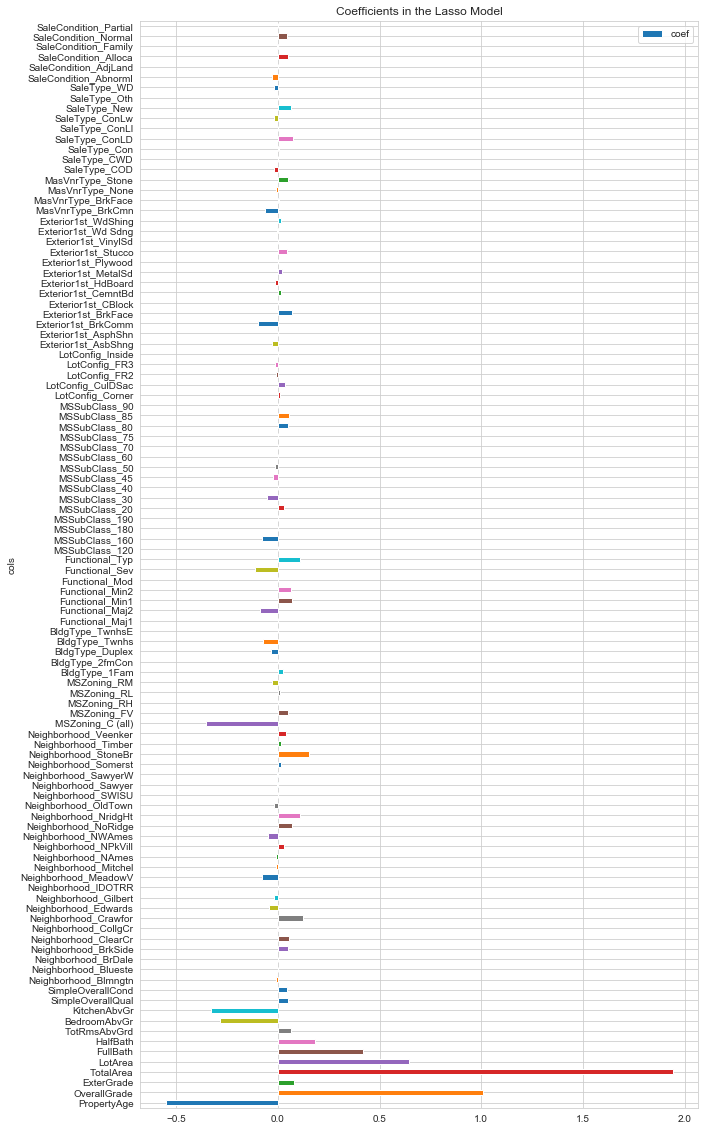

In [45]:
lasso_features = features.drop(drop_features, axis=1)

# CV Model
cv_model = LassoCV(
    # Returns R^2 score which can be negative
    alphas=[0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10],
    cv=10
)
cv_model.fit(lasso_features, target)
alpha = cv_model.alpha_

# Individual Model
model = Lasso(alpha=cv_model.alpha_)
model.fit(lasso_features, target)
print('Alpha:', alpha)
print('Score:', model.score(lasso_features, target))

df_results = append_results(df_results, model, 'Lasso', lasso_features)

coef_df = pd.DataFrame()
coef_df['coef'] = model.coef_.ravel()
coef_df['cols'] = lasso_features.columns.tolist()
matplotlib.rcParams['figure.figsize'] = (10.0, 20.0)
coef_df.plot(
    kind='barh',
    x='cols',
    y='coef'
)
plt.title("Coefficients in the Lasso Model")

#### ElasticNet

In [37]:
drop_features = [
    'OverallQual',
#     'PropertyAge',
#     'OverallGrade',
#     'ExterGrade',
    'CoreArea',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
#     'TotalArea',
#     'LotArea',
#     'FullBath',
#     'HalfBath',
    'TotalBath',
#     'TotRmsAbvGrd',
#     'BedroomAbvGr',
#     'KitchenAbvGr',
#     'SimpleOverallQual',
#     'SimpleOverallCond',
    'IsRemodelled',
    'IsNew',
#     'Neighborhood_Blmngtn',
#     'Neighborhood_Blueste',
#     'Neighborhood_BrDale',
#     'Neighborhood_BrkSide',
#     'Neighborhood_ClearCr',
#     'Neighborhood_CollgCr',
#     'Neighborhood_Crawfor',
#     'Neighborhood_Edwards',
#     'Neighborhood_Gilbert',
#     'Neighborhood_IDOTRR',
#     'Neighborhood_MeadowV',
#     'Neighborhood_Mitchel',
#     'Neighborhood_NAmes',
#     'Neighborhood_NPkVill',
#     'Neighborhood_NWAmes',
#     'Neighborhood_NoRidge',
#     'Neighborhood_NridgHt',
#     'Neighborhood_OldTown',
#     'Neighborhood_SWISU',
#     'Neighborhood_Sawyer',
#     'Neighborhood_SawyerW',
#     'Neighborhood_Somerst',
#     'Neighborhood_StoneBr',
#     'Neighborhood_Timber',
#     'Neighborhood_Veenker',
#     'MSZoning_C (all)',
#     'MSZoning_FV',
#     'MSZoning_RH',
#     'MSZoning_RL',
#     'MSZoning_RM',
#     'BldgType_1Fam',
#     'BldgType_2fmCon',
#     'BldgType_Duplex',
#     'BldgType_Twnhs',
#     'BldgType_TwnhsE',
#     'Functional_Maj1',
#     'Functional_Maj2',
#     'Functional_Min1',
#     'Functional_Min2',
#     'Functional_Mod',
#     'Functional_Sev',
#     'Functional_Typ',
#     'MSSubClass_120',
#     'MSSubClass_160',
#     'MSSubClass_180',
#     'MSSubClass_190',
#     'MSSubClass_20',
#     'MSSubClass_30',
#     'MSSubClass_40',
#     'MSSubClass_45',
#     'MSSubClass_50',
#     'MSSubClass_60',
#     'MSSubClass_70',
#     'MSSubClass_75',
#     'MSSubClass_80',
#     'MSSubClass_85',
#     'MSSubClass_90',
    'Condition1_Artery',
    'Condition1_Feedr',
    'Condition1_Norm',
    'Condition1_PosA',
    'Condition1_PosN',
    'Condition1_RRAe',
    'Condition1_RRAn',
    'Condition1_RRNe',
    'Condition1_RRNn',
#     'LotConfig_Corner',
#     'LotConfig_CulDSac',
#     'LotConfig_FR2',
#     'LotConfig_FR3',
#     'LotConfig_Inside',
#     'Exterior1st_AsbShng',
#     'Exterior1st_AsphShn',
#     'Exterior1st_BrkComm',
#     'Exterior1st_BrkFace',
#     'Exterior1st_CBlock',
#     'Exterior1st_CemntBd',
#     'Exterior1st_HdBoard',
#     'Exterior1st_ImStucc',
#     'Exterior1st_MetalSd',
#     'Exterior1st_Plywood',
#     'Exterior1st_Stone',
#     'Exterior1st_Stucco',
#     'Exterior1st_VinylSd',
#     'Exterior1st_Wd Sdng',
#     'Exterior1st_WdShing',
#     'MasVnrType_BrkCmn',
#     'MasVnrType_BrkFace',
#     'MasVnrType_None',
#     'MasVnrType_Stone',
#     'SaleType_COD',
#     'SaleType_CWD',
#     'SaleType_Con',
#     'SaleType_ConLD',
#     'SaleType_ConLI',
#     'SaleType_ConLw',
#     'SaleType_New',
#     'SaleType_Oth',
#     'SaleType_WD',
#     'SaleCondition_Abnorml',
#     'SaleCondition_AdjLand',
#     'SaleCondition_Alloca',
#     'SaleCondition_Family',
#     'SaleCondition_Normal',
#     'SaleCondition_Partial'
]

/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discourag

/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged

/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged

/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged

/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged

/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged

/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tomewing/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

Alpha: 0.0001
l1: 1.0
Score: 0.9211064979226192


Text(0.5,1,'Coefficients in the ElasticNet Model')

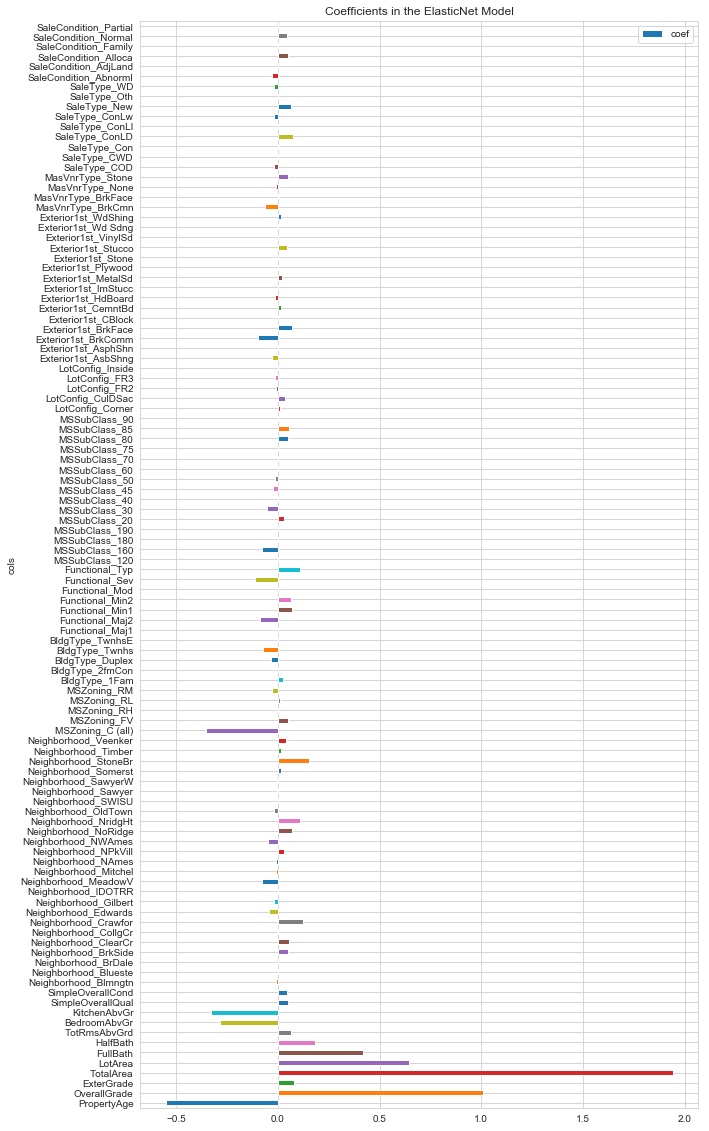

In [38]:
elastic_features = features.drop(drop_features, axis=1)

# CV Model
cv_model = ElasticNetCV(
    l1_ratio=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    alphas=[0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10],
    cv=20
)
cv_model.fit(elastic_features, target)

# Individual Model
model = ElasticNet(
    l1_ratio=cv_model.l1_ratio_,
    alpha=cv_model.alpha_
)
model.fit(elastic_features, target)
print('Alpha:', cv_model.alpha_)
print('l1:', cv_model.l1_ratio_)
print('Score:', model.score(elastic_features, target))
df_results = append_results(df_results, model, 'ElasticNet', elastic_features)
coef_df = pd.DataFrame()
coef_df['coef'] = model.coef_.ravel()
coef_df['cols'] = elastic_features.columns.tolist()
matplotlib.rcParams['figure.figsize'] = (10.0, 20.0)
coef_df.plot(
    kind='barh',
    x='cols',
    y='coef'
)
plt.title("Coefficients in the ElasticNet Model")

#### Exploration

In [ ]:
end_cols = [
    'SalePrice',
    'Linear',    
    'Ridge',    
    'Lasso', 
    'ElasticNet',
    'LinearError',
    'RidgeError',    
    'LassoError',
    'ElasticNetError',    
    'LinearRMSE',
    'RidgeRMSE',
    'LassoRMSE',    
    'ElasticNetRMSE',
    'SalePriceLog',
    'LinearRMSLE',
    'LinearRMSLEDiff',
    'RidgeRMSLE',
    'RidgeRMSLEDiff',
    'LassoRMSLE',
    'LassoRMSLEDiff',
    'ElasticNetRMSLE',
    'ElasticNetRMSLEDiff'
]
df_results = df_results[[col for col in df_results if col not in end_cols] + end_cols].sort_values('SalePrice')
df_results.to_csv(model_out, index=False)

In [ ]:
# Ridge Regression
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
cv = [
    rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas
]
cv = pd.Series(cv, index = alphas)
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
cv.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [ ]:
model = Ridge(alpha=0.4).fit(features, target)
coef_df = pd.DataFrame()
coef_df['coef'] = model.coef_.ravel()
coef_df['cols'] = features.columns.tolist()
matplotlib.rcParams['figure.figsize'] = (10.0, 20.0)
coef_df.plot(
    kind='barh',
    x='cols',
    y='coef'
)
plt.title("Coefficients in the Ridge Model")

In [ ]:
# Lasso Regression
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
cv = [
    rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas
]
cv = pd.Series(cv, index = alphas)
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
cv.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [ ]:
model = Lasso(alpha=0.001).fit(features, target)
coef_df = pd.DataFrame()
coef_df['coef'] = model.coef_.ravel()
coef_df['cols'] = features.columns.tolist()
matplotlib.rcParams['figure.figsize'] = (10.0, 20.0)
coef_df.plot(
    kind='barh',
    x='cols',
    y='coef'
)
plt.title("Coefficients in the Ridge Model")

#### Submission

In [46]:
test_features = df_test_in[lasso_features.columns.tolist()]
df_sub = pd.DataFrame()
df_sub['Id'] = df_test_in['Id']
df_sub['SalePrice'] = np.expm1(model.predict(test_features))
df_sub.to_csv('./data/output_data/my_submission.csv', index=False)

#### Sources & Reference

Tutorials & Papers:  
* [Cardinality Reduction](https://pkghosh.wordpress.com/2017/10/09/combating-high-cardinality-features-in-supervised-machine-learning/)  
* [FA & PCA](https://www.dummies.com/programming/big-data/data-science/data-science-using-python-to-perform-factor-and-principal-component-analysis/)  
* [Factor Analysis for Decomposition](https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781783989485/1/ch01lvl1sec19/using-factor-analysis-for-decomposition)  
* [SKL Decomposition](http://scikit-learn.org/stable/modules/decomposition.html)  
* [Clustering Mixed Data](https://datascience.stackexchange.com/questions/8681/clustering-for-mixed-numeric-and-nominal-discrete-data)  
* [Log Transforms](https://stats.stackexchange.com/questions/18844/when-and-why-should-you-take-the-log-of-a-distribution-of-numbers)
* [Box Cox Transformation](https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/)  
* [Log Transforms](http://onlinestatbook.com/2/transformations/log.html)   
* [SKL ensembling](http://scikit-learn.org/stable/modules/ensemble.html)  


Kaggle Kernels & Notebooks: 
* [Data Exploration Kernel](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
* [Good Overall Kaggle Kernel](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)  
* [Applied Regression](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)  
* [Regularized Linear Models](https://www.kaggle.com/apapiu/regularized-linear-models)  